<a href="https://colab.research.google.com/github/Don-Ho25/Colab_Git_Assignment2/blob/main/Lesson8/Assignment8_SupervisedLearningClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 8

DONG

[link to GITHUB](https://colab.research.google.com/github/Don-Ho25/Colab_Git_Assignment2/blob/main/Lesson8/Assignment8_SupervisedLearningClassification.ipynb#scrollTo=GdfpWZEOQW7r)

In [25]:
import kagglehub
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


We will be using the **Breast Cancer Wisconsin (Diagnostic)** Dataset. It  was created by researchers at the University of Wisconsin Hospitals, Madison, based on digitized images of fine needle aspirate (FNA) samples of breast masses.
The primary purpose of the dataset is to help in the diagnosis of breast cancer, classifying tumors as either malignant (cancerous) or benign (non-cancerous).

In [4]:
cancer = load_breast_cancer(as_frame=True)
df = cancer.frame

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


All the data in this dataset are numerical. The features are continuous, and the target is binary.

In [8]:
# --- EDA and Data Preprocessing ---
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


The dataset is clean with no missing values.

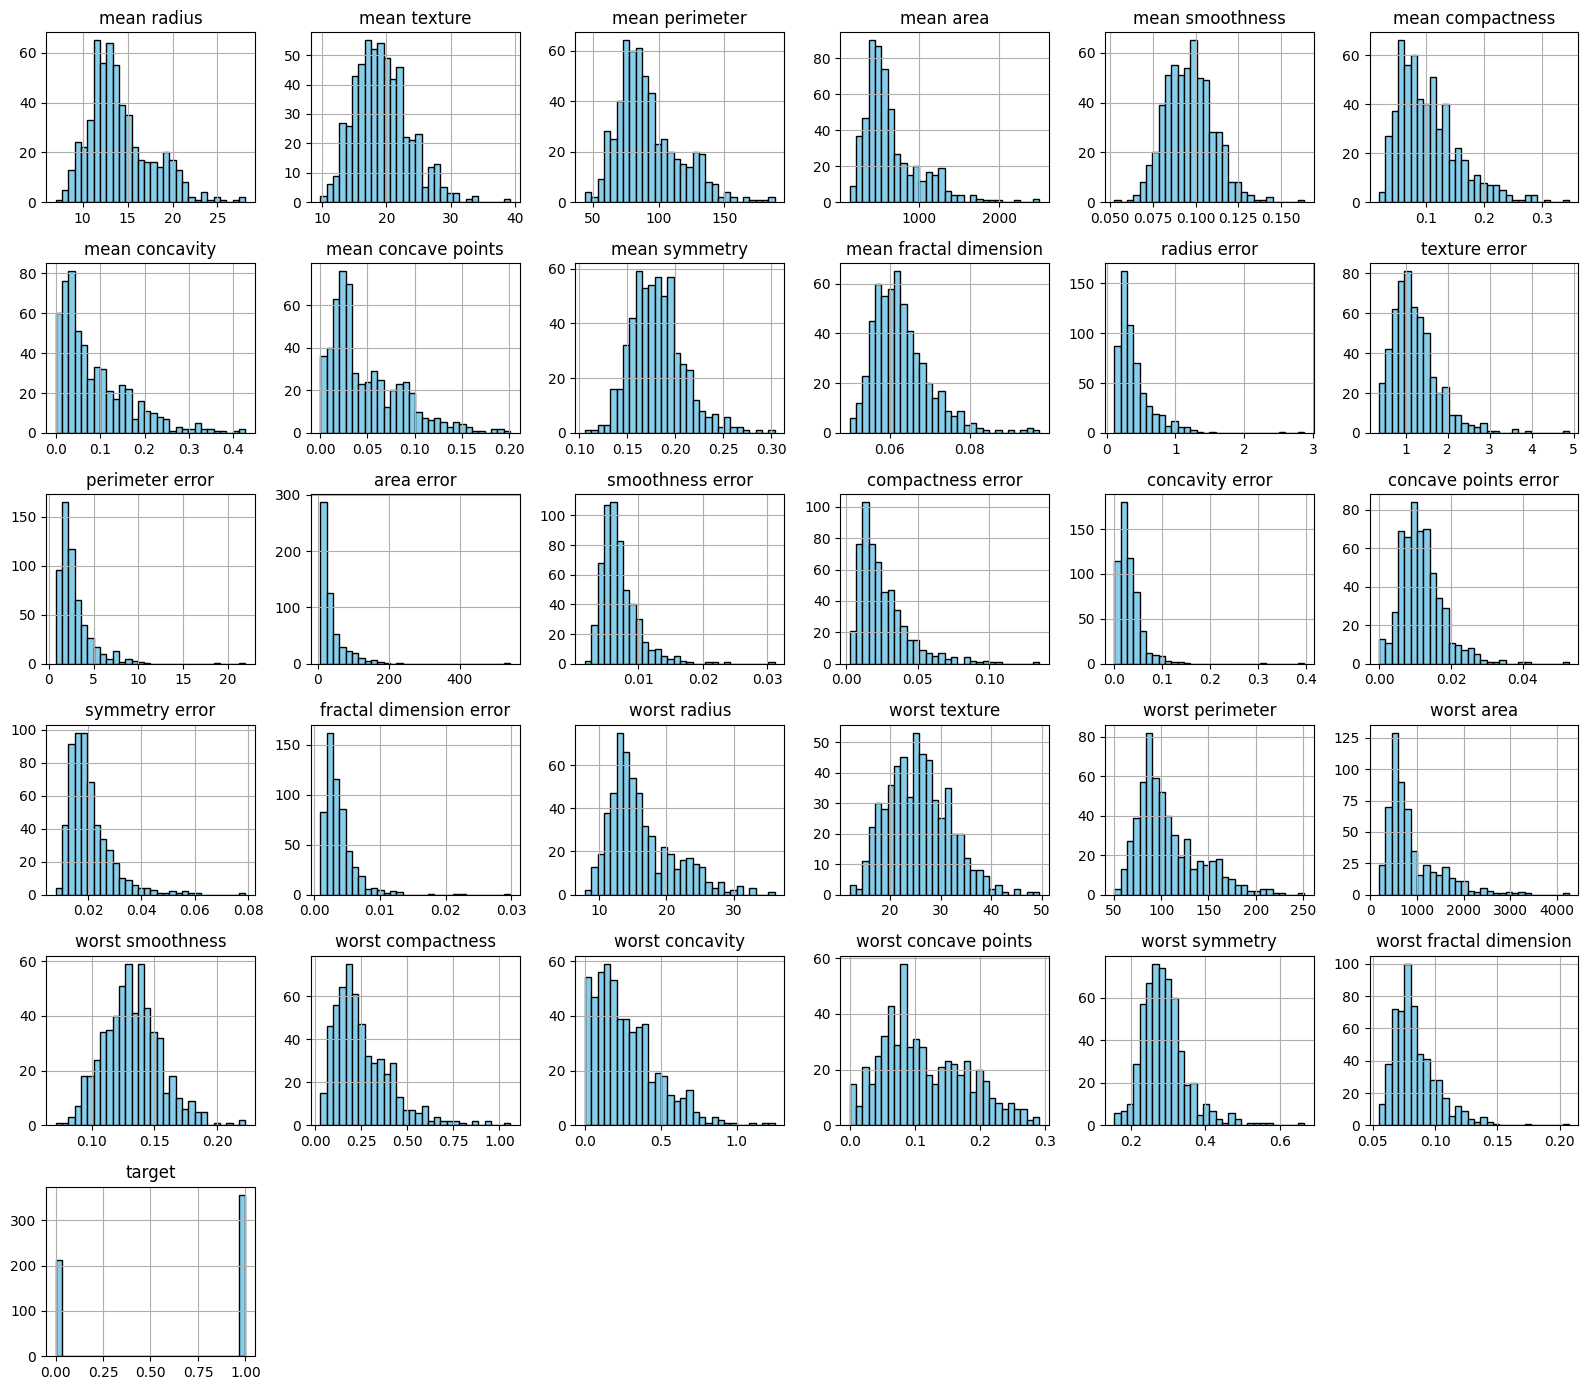

In [9]:
# Visualuze data.

df.hist(figsize=(16, 14), bins=30, color="skyblue",edgecolor='k')
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.tight_layout()
plt.show()


Generating scatter plots for features vs 'target'...


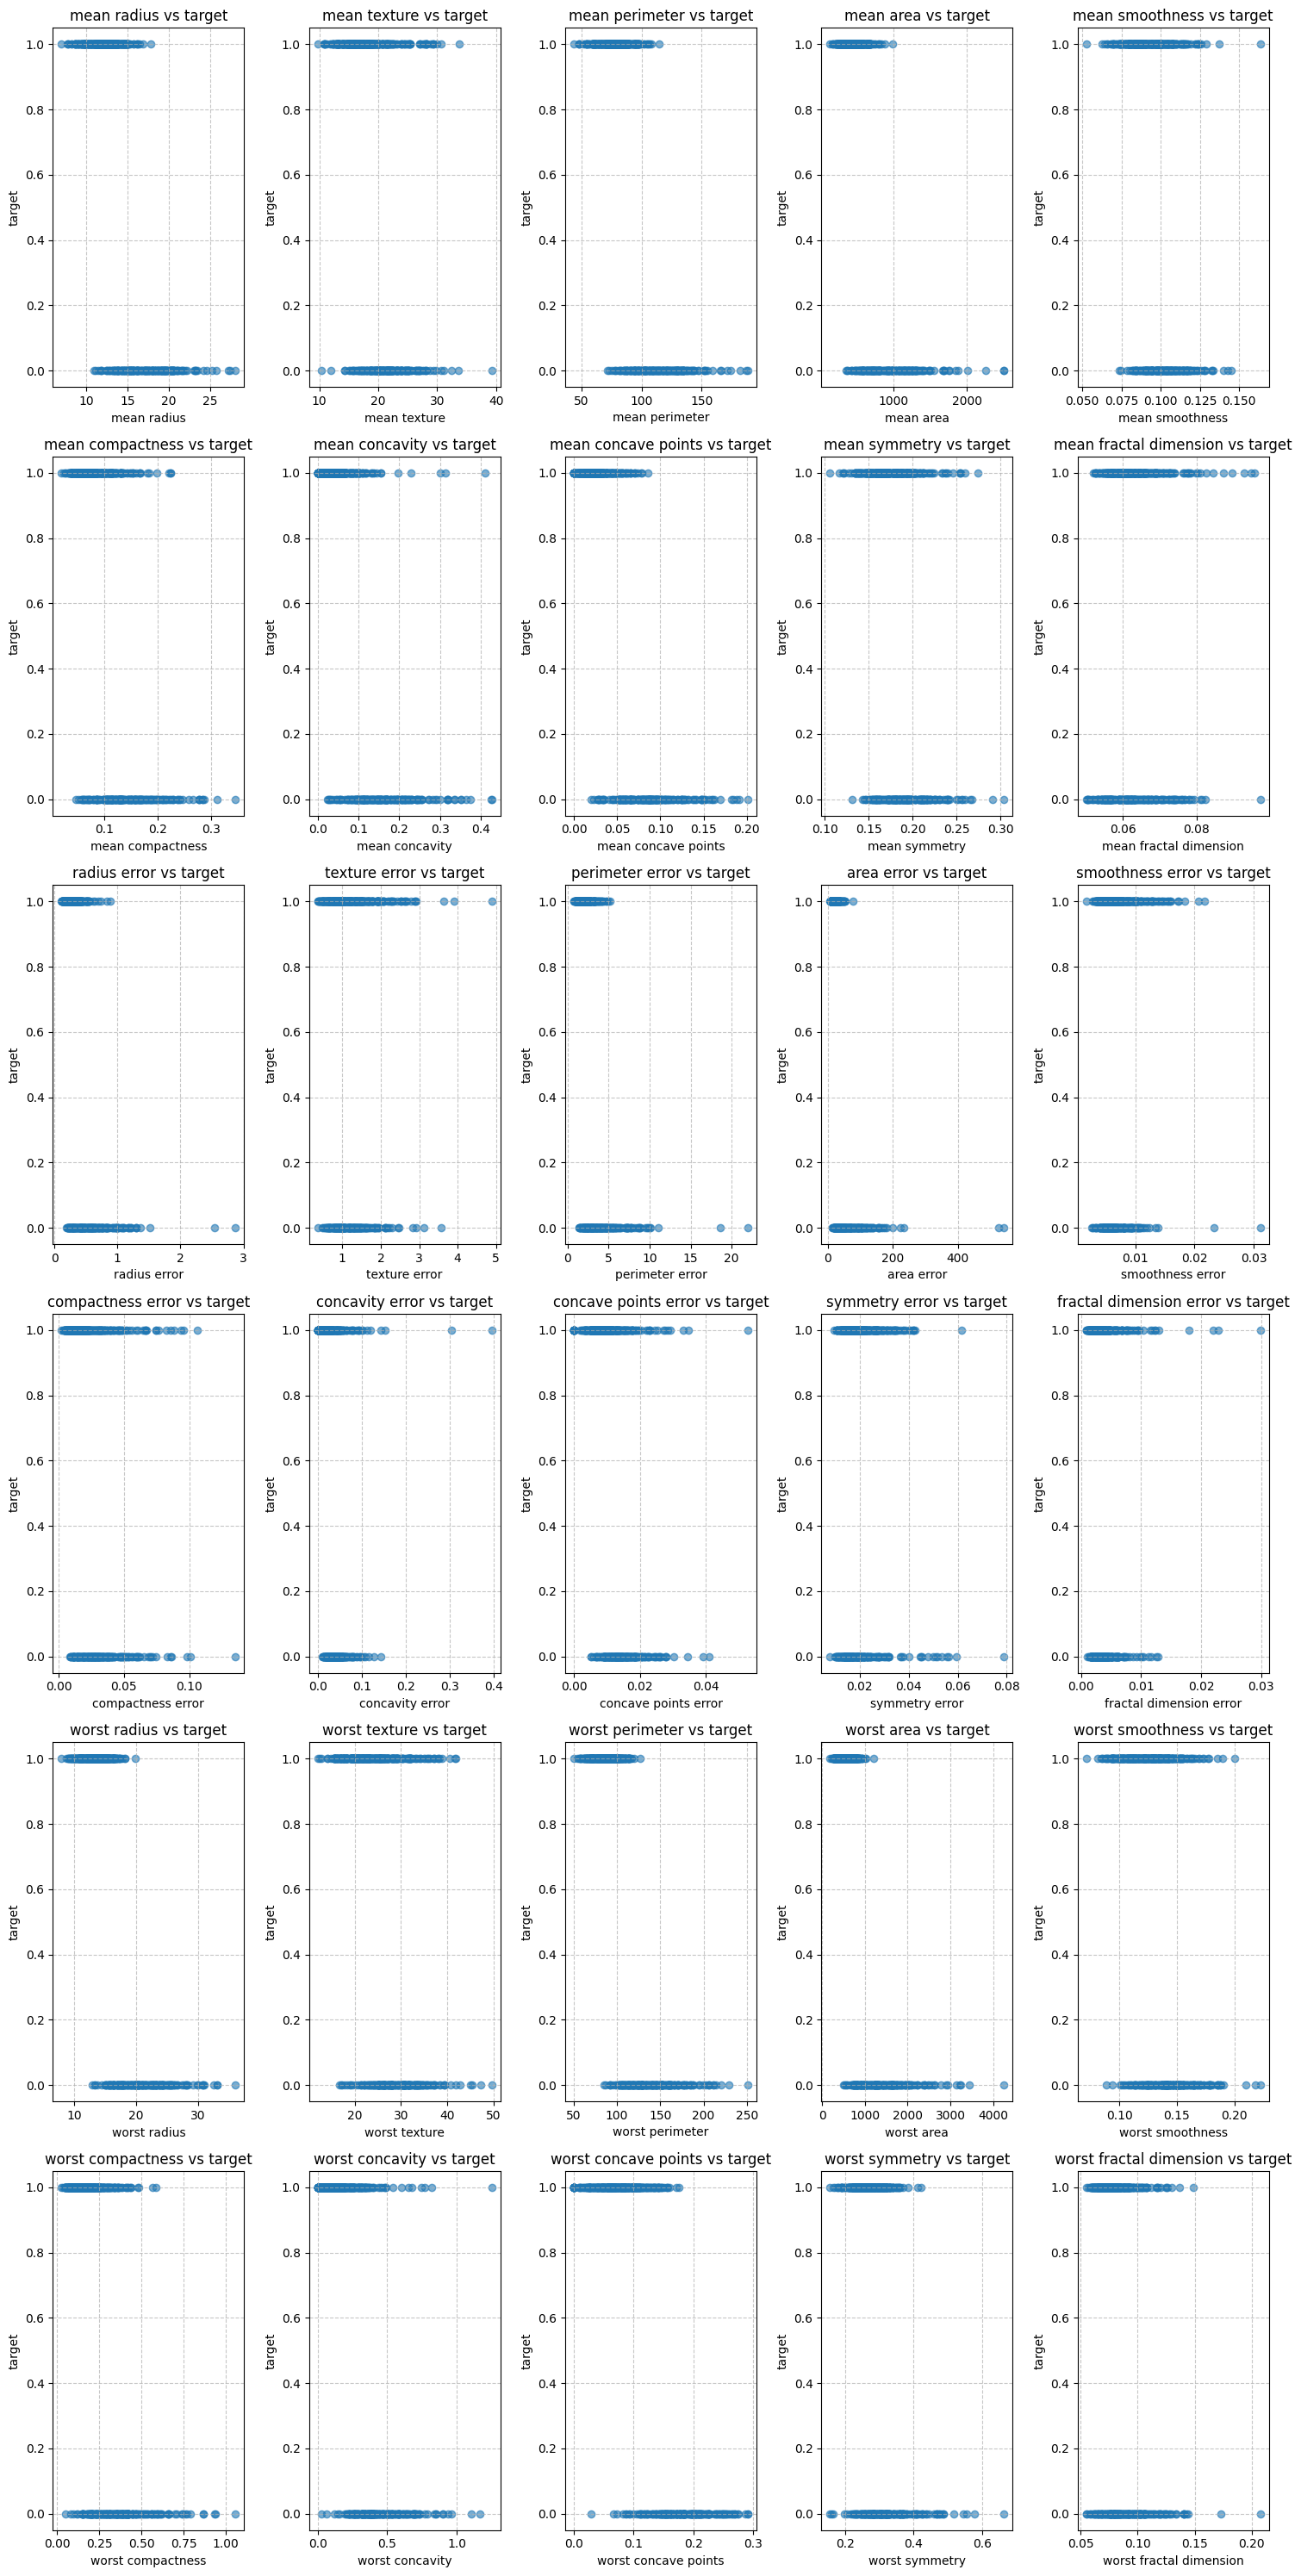

In [10]:
def Scatter_Features_vs_Target(DF, Target='target'):

    features = DF.drop(Target, axis=1)  # All columns except target
    target = DF[Target]

    # Calculate number of subplots needed
    n_features = len(features.columns)
    n_cols = 5 # Number of columns in subplot grid
    n_rows = (n_features + n_cols - 1) // n_cols

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]

    # Create scatter plot for each feature
    print(f"Generating scatter plots for features vs '{Target}'...")
    for i, feature in enumerate(features.columns):
        axes[i].scatter(features[feature], target, alpha=0.6)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(Target)
        axes[i].set_title(f'{feature} vs {Target}')
        axes[i].grid(True, linestyle='--', alpha=0.7)

    # Hide empty subplots
    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
### call the function
Scatter_Features_vs_Target(df)

Given the difference in scale, it will be better to normaliz the data:

In [12]:
scaler = StandardScaler()
# Select all columns except 'target' for scaling
numeric_cols = df.columns.drop('target')
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)
df_scaled.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [14]:
#data spliting

X = df_scaled
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#Model Selection: Support Vector Machine   and k-Nearest Neighbors


model1 = SVC()
model2 = KNeighborsClassifier()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
#model evaluation

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

In [27]:
# Evaluate the models on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

print("\n--- Suport Vector Machine Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred1):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred1))




--- Suport Vector Machine Evaluation ---
Accuracy: 0.9737

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
[[41  2]
 [ 1 70]]


In [28]:

print("\n--k-nearest neighbor Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred2):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred2))


--k-nearest neighbor Evaluation ---
Accuracy: 0.9474

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Confusion Matrix:
[[40  3]
 [ 3 68]]


The Support Vector Classifier (SVC) is the superior model for this cancer classification task based on the provided results.


- Higher Overall Accuracy: SVC (97%) vs. KNN (94.74%).

- Better Recall for Malignant Cases (Class 1): SVC (0.99) vs. KNN (0.96). This is the most critical difference in a medical context like cancer diagnosis, as minimizing false negatives (missing actual cancer) is paramount. A 0.99 recall means only 1 out of 71 malignant cases was missed by SVC, whereas KNN would have missed roughly 3 out of 71.

- Fewer False Negatives: SVC has only 1 false negative, while KNN would likely have around 3.

While both models show good performance, the SVC's ability to nearly perfectly identify malignant cases makes it the preferred choice for this specific application: